# Dados cartográficos com Python

## GeoPandas

GeoPandas é uma biblioteca do Python que estende as funcionalidades do Pandas, permitindo que se trabalhe de maneira eficiente com dados geoespaciais. Ela é construída sobre outras bibliotecas populares como Shapely, Fiona e Pyproj, o que lhe permite manipular, analisar e visualizar dados geoespaciais de forma integrada e simplificada.

A principal característica do GeoPandas é a capacidade de lidar com geometrias (pontos, linhas, polígonos, etc.) em colunas especiais chamadas de `GeoSeries`. Essas geometrias podem ser usadas para representar entidades espaciais, como localizações geográficas, fronteiras de cidades, ou trajetórias. Cada linha de um `GeoDataFrame`—a versão geoespacial do `DataFrame` no Pandas—pode conter uma geometria associada a outros atributos, permitindo que se façam análises espaciais sobre os dados.

Com o GeoPandas, tarefas comuns em análise geoespacial, como a leitura de arquivos shapefile, a re-projeção de sistemas de coordenadas e operações espaciais (interseção, união, diferenciação) tornam-se muito mais fáceis. A biblioteca é amplamente usada em aplicações que envolvem geoprocessamento, cartografia e estudos de geografia.

GeoPandas também se integra bem com bibliotecas de visualização como Matplotlib, facilitando a criação de mapas e gráficos baseados em dados espaciais. Ela é amplamente usada em estudos ambientais, urbanos, logísticos e em qualquer área que necessite de análise espacial eficiente.

https://geopandas.org/en/stable/index.html

## Folium

Folium é uma biblioteca do Python voltada para a criação de mapas interativos utilizando Leaflet.js, uma popular biblioteca JavaScript de mapeamento. O Folium permite que se criem mapas ricos e dinâmicos diretamente em Python, integrando dados geoespaciais de maneira simples e intuitiva.

Uma das principais vantagens do Folium é a facilidade com que ele transforma dados geoespaciais, como pontos de interesse, trajetos ou áreas geográficas, em visualizações interativas. Ele suporta uma ampla gama de camadas, como marcadores, polígonos, retângulos e círculos, que podem ser facilmente sobrepostos em diferentes tipos de mapas base, como mapas de ruas ou satélites. Além disso, a biblioteca permite adicionar informações complementares por meio de popups e tooltips, o que facilita a apresentação de dados complexos de forma clara e acessível.

Folium é frequentemente utilizado em projetos que requerem visualizações de dados espaciais interativas, como análise de trajetórias, planejamento urbano, monitoramento ambiental e estudos logísticos. Sua integração com outras bibliotecas como Pandas e GeoPandas permite manipular dados e criar mapas de forma eficiente. A biblioteca também facilita a exportação dos mapas para HTML, o que é útil para incorporá-los em sites ou relatórios interativos.

De maneira geral, Folium oferece uma solução para transformar dados geoespaciais em mapas interativos, sendo uma escolha popular tanto em análises exploratórias quanto na apresentação final de resultados.

https://python-visualization.github.io/folium/latest/#

In [8]:
import folium
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from folium import plugins
from shapely.geometry import Point

from src.config import DADOS_LIMPOS, DADOS_GEO_ORIGINAIS,DADOS_GEO_MEDIAN
from src.graficos import SCATTER_ALPHA, PALETTE

sns.set_theme(style="white", palette="bright")

In [9]:
df = pd.read_parquet(DADOS_LIMPOS)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,5,6.984127,2.555556,0.146591
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,5,6.238137,2.109842,0.155797
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,2,4.294117,2.026891,0.260274
3,-122.260002,37.849998,50,1120,283,697,264,2.1250,140000,NEAR BAY,2,4.242424,2.640152,0.252679
4,-122.260002,37.840000,50,2239,455,990,419,1.9911,158700,NEAR BAY,2,5.343676,2.362768,0.203216


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float32 
 1   latitude                  17564 non-null  float32 
 2   housing_median_age        17564 non-null  int8    
 3   total_rooms               17564 non-null  int16   
 4   total_bedrooms            17564 non-null  int16   
 5   population                17564 non-null  int16   
 6   households                17564 non-null  int16   
 7   median_income             17564 non-null  float32 
 8   median_house_value        17564 non-null  int32   
 9   ocean_proximity           17564 non-null  category
 10  median_income_cat         17564 non-null  int64   
 11  rooms_per_household       17564 non-null  float32 
 12  population_per_household  17564 non-null  float32 
 13  bedrooms_per_room         17564 non-null  floa

O melhor termo para traduzir **"county"** seria **"condado"**. Embora o Brasil não tenha uma divisão administrativa exata equivalente aos condados dos Estados Unidos, "condado" é uma tradução apropriada e amplamente compreendida.

Nos EUA, os **counties** (condados) são subdivisões dos estados, com certa autonomia administrativa, similar às regiões intermediárias entre estados e municípios no Brasil. No entanto, a melhor correspondência prática no Brasil, considerando a divisão político-administrativa, seria com os **municípios**, que são as subdivisões administrativas dos estados brasileiros, apesar de suas diferenças em termos de autonomia e funções.


In [12]:
gdf_counties = gpd.read_file(DADOS_GEO_ORIGINAIS)

gdf_counties.head()

,name,fullname,abbrev,abcode,ansi,geometry
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.45 41.184, -121.46 41.184, -121..."
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19 41.736, -124.19 41.737..."
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.45 41.997, -121.42 41.997, -121..."
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.67 40.776, -122.67 40.776, -122..."
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17 40.379, -122.17 40.379, -122..."


Em um arquivo GeoJSON, colunas como **"abcode"** e **"ansi"** contêm códigos padronizados que identificam de maneira única regiões geográficas, divisões administrativas ou entidades espaciais.

A coluna **"abcode"** representa **códigos de fronteira administrativa** (Administrative Boundary Code). Esses códigos são usados para identificar divisões administrativas, como estados, condados, cidades ou outras subdivisões de um país. Dependendo do contexto, "abcode" pode estar relacionado a códigos nacionais ou internacionais de áreas administrativas.

Por exemplo:
- Nos Estados Unidos, o "abcode" pode se referir a códigos FIPS (Federal Information Processing Standards), usados para identificar estados e condados.
- Em outros países, pode ser um código específico para uma província, estado ou outra divisão territorial.

A coluna **"ansi"** refere-se aos códigos do **American National Standards Institute (ANSI)** (American National Standards Institute Code), usados nos Estados Unidos para identificar regiões geográficas. O ANSI substituiu os códigos FIPS em 2008 como padrão de identificação de entidades geográficas, como estados e condados.

Por exemplo:
- Nos EUA, cada estado e condado tem um **ANSI code** único que os identifica de forma oficial. Para estados, o ANSI code é o mesmo que o código FIPS (geralmente um número de 2 dígitos), e para condados, é um número de 5 dígitos.

Assim: 

- **abcode**: Refere-se a um código de fronteira administrativa, usado para identificar divisões geográficas ou administrativas específicas, como estados, cidades ou condados.
- **ansi**: Refere-se a códigos padronizados pelo ANSI, usados principalmente nos EUA para identificar estados e condados. Esses códigos são uma forma de identificar regiões geográficas de maneira única e padronizada.

### Sobre sistemas de referência

Um Sistema de Referência de Coordenadas (CRS, do inglês *Coordinate Reference System*) é o conjunto de regras que define como os dados geoespaciais são projetados na superfície da Terra. Imagine o CRS como uma forma de "tradução" que nos ajuda a entender e posicionar os dados geográficos corretamente em um mapa. Cada ponto no mapa (como uma cidade, uma montanha ou uma estrada) tem coordenadas que dependem do CRS usado. Essas coordenadas podem ser expressas em diferentes sistemas, como latitudes e longitudes ou distâncias em metros.

Por que isso é importante? Quando trabalhamos com dados geoespaciais, especialmente em formatos como GeoJSON, Shapefiles ou outros, o CRS nos diz como interpretar as coordenadas. Por exemplo, o sistema mais comum que você verá é o WGS 84 (EPSG:4326), que usa latitude e longitude para posicionar qualquer ponto na Terra. No entanto, em projetos locais ou regionais, outros sistemas de referência podem ser usados, que distorcem menos as áreas específicas.

Quando você abre um arquivo GeoJSON ou outro tipo de dado geoespacial, muitas vezes verá algo como "crs": {"type": "name", "properties": {"name": "EPSG:4326"}}. Isso está simplesmente informando qual sistema está sendo usado para mapear as coordenadas no arquivo. Se diferentes arquivos estiverem em CRSs distintos, será necessário convertê-los para o mesmo sistema, ou eles não se alinharão corretamente quando visualizados juntos.



**WGS 84** é um sistema geodésico global que define um modelo matemático para a forma da Terra. Ele inclui um elipsoide de referência (uma representação matemática da Terra), um sistema de coordenadas cartesianas (X, Y, Z) e um sistema de coordenadas geográficas (latitude, longitude e altura). Esse sistema é amplamente usado em GPS e outros sistemas de posicionamento global, sendo uma das referências mais comuns para medir e mapear a superfície da Terra.

**EPSG:4326**, por outro lado, é o código de identificação que faz parte de uma base de dados chamada **EPSG Registry**, que contém descrições de vários sistemas de referência de coordenadas usados globalmente. O código **4326** se refere especificamente ao CRS que utiliza o **WGS 84** como sistema geodésico de base e expressa coordenadas em graus de latitude e longitude. Esse código é amplamente utilizado em formatos geoespaciais, como GeoJSON, para identificar que o sistema de coordenadas é o WGS 84.

Então, podemos dizer que **WGS 84** é o sistema geodésico, e **EPSG:4326** é o código que referencia esse sistema específico dentro de um conjunto de padrões geoespaciais. Eles estão intimamente relacionados, pois EPSG:4326 usa WGS 84, mas o EPSG:4326 é apenas uma forma de identificar esse sistema em softwares e arquivos.

#### Relação com as projeções de mapas

A Terra tem uma forma quase esférica (na verdade, ela é um esferoide oblato, ligeiramente achatada nos polos), mas os mapas são geralmente representações bidimensionais. Isso gera um desafio: como transformar a superfície curva da Terra em um mapa plano? É aí que entram as **projeções cartográficas**.

**Projeção cartográfica** é o método utilizado para "achatar" a superfície da Terra em um plano, permitindo a criação de mapas. Cada projeção tenta preservar algumas características da Terra (como áreas, formas ou distâncias), mas sempre há algum tipo de distorção, já que é impossível representar uma superfície curva em um plano sem perdas.

Agora, voltando ao **WGS 84** e **EPSG:4326**:

- **WGS 84** é um sistema de referência global que define coordenadas em latitude e longitude, como mencionado antes, sem aplicar diretamente uma projeção cartográfica. Ou seja, ele usa um sistema geodésico para definir onde os pontos estão na superfície curva da Terra, sem "achatar" essa superfície em um mapa.

- Quando usamos **EPSG:4326**, estamos trabalhando com coordenadas de latitude e longitude, mas sem projetar essas coordenadas em uma forma plana (ainda estamos no sistema esférico). Essa é uma das formas mais comuns de representar dados geoespaciais porque é universal e fácil de entender, mas não é exatamente uma projeção cartográfica.

As projeções cartográficas que aprendemos na escola—como a **projeção de Mercator** (que distorce áreas perto dos polos), a **projeção de Peters** (que tenta preservar áreas), ou a **projeção azimutal** (que preserva direções a partir de um ponto central)—são formas de transformar as coordenadas da Terra em um plano. Dependendo da finalidade do mapa, uma projeção pode ser mais adequada que outra.

Por exemplo:

- A **projeção de Mercator** é útil para navegação porque preserva ângulos e direções, mas distorce o tamanho das regiões conforme se aproximam dos polos.
- A **projeção de Peters** tenta representar as áreas de forma mais precisa, mas distorce as formas dos continentes.

Quando usamos um CRS como o **EPSG:4326** (WGS 84), estamos basicamente posicionando pontos na superfície curva da Terra. Para "achatar" esses pontos em um mapa, muitas vezes usamos uma projeção cartográfica. Por exemplo, se quisermos criar um mapa que use uma projeção de Mercator, utilizamos outro CRS específico para essa projeção, como o **EPSG:3857**, que é a projeção de Mercator.

Em resumo, os conceitos de sistemas de referência de coordenadas (CRS) e projeções cartográficas estão conectados. O CRS nos dá as coordenadas na superfície curva da Terra, e a projeção cartográfica define como essas coordenadas serão representadas em um mapa plano.

In [19]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,5,6.984127,2.555556,0.146591
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,5,6.238137,2.109842,0.155797
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,2,4.294117,2.026891,0.260274
3,-122.260002,37.849998,50,1120,283,697,264,2.1250,140000,NEAR BAY,2,4.242424,2.640152,0.252679
4,-122.260002,37.840000,50,2239,455,990,419,1.9911,158700,NEAR BAY,2,5.343676,2.362768,0.203216


In [20]:
pontos = [Point(long, lat) for long, lat in zip(df["longitude"], df["latitude"])]

pontos[:5]

[<POINT (-122 37.9)>,
 <POINT (-122 37.9)>,
 <POINT (-122 37.8)>,
 <POINT (-122 37.8)>,
 <POINT (-122 37.8)>]

In [21]:
gdf = gpd.GeoDataFrame(df, geometry=pontos)

gdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room,geometry
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,5,6.984127,2.555556,0.146591,POINT (-122.23 37.88)
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,5,6.238137,2.109842,0.155797,POINT (-122.22 37.86)
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,2,4.294117,2.026891,0.260274,POINT (-122.26 37.84)
3,-122.260002,37.849998,50,1120,283,697,264,2.1250,140000,NEAR BAY,2,4.242424,2.640152,0.252679,POINT (-122.26 37.85)
4,-122.260002,37.840000,50,2239,455,990,419,1.9911,158700,NEAR BAY,2,5.343676,2.362768,0.203216,POINT (-122.26 37.84)


In [22]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float32 
 1   latitude                  17564 non-null  float32 
 2   housing_median_age        17564 non-null  int8    
 3   total_rooms               17564 non-null  int16   
 4   total_bedrooms            17564 non-null  int16   
 5   population                17564 non-null  int16   
 6   households                17564 non-null  int16   
 7   median_income             17564 non-null  float32 
 8   median_house_value        17564 non-null  int32   
 9   ocean_proximity           17564 non-null  category
 10  median_income_cat         17564 non-null  int64   
 11  rooms_per_household       17564 non-null  float32 
 12  population_per_household  17564 non-null  float32 
 13  bedrooms_per_room         17564 non-nu

In [23]:
gdf_counties.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
gdf = gdf.set_crs(epsg=4326)

gdf_counties = gdf_counties.to_crs(epsg=4326)

In [25]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
gdf_counties.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#spatial-joins

https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html

In [28]:
gdf_joined = gpd.sjoin(gdf, gdf_counties, how="left", predicate="within")
gdf_joined.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,rooms_per_household,population_per_household,bedrooms_per_room,geometry,index_right,name,fullname,abbrev,abcode,ansi
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,...,6.984127,2.555556,0.146591,POINT (-122.23 37.88),34.0,Alameda,Alameda County,ALA,c001,001
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,...,6.238137,2.109842,0.155797,POINT (-122.22 37.86),34.0,Alameda,Alameda County,ALA,c001,001
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,...,4.294117,2.026891,0.260274,POINT (-122.26 37.84),34.0,Alameda,Alameda County,ALA,c001,001
3,-122.260002,37.849998,50,1120,283,697,264,2.1250,140000,NEAR BAY,...,4.242424,2.640152,0.252679,POINT (-122.26 37.85),34.0,Alameda,Alameda County,ALA,c001,001
4,-122.260002,37.840000,50,2239,455,990,419,1.9911,158700,NEAR BAY,...,5.343676,2.362768,0.203216,POINT (-122.26 37.84),34.0,Alameda,Alameda County,ALA,c001,001


In [29]:
gdf_joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 17564 entries, 0 to 17563
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float32 
 1   latitude                  17564 non-null  float32 
 2   housing_median_age        17564 non-null  int8    
 3   total_rooms               17564 non-null  int16   
 4   total_bedrooms            17564 non-null  int16   
 5   population                17564 non-null  int16   
 6   households                17564 non-null  int16   
 7   median_income             17564 non-null  float32 
 8   median_house_value        17564 non-null  int32   
 9   ocean_proximity           17564 non-null  category
 10  median_income_cat         17564 non-null  int64   
 11  rooms_per_household       17564 non-null  float32 
 12  population_per_household  17564 non-null  float32 
 13  bedrooms_per_room         17564 non-null  f

In [30]:
gdf_joined = gdf_joined.drop(
    columns=["index_right", "fullname", "abcode", "ansi"]

)
gdf_joined.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room,geometry,name,abbrev
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,5,6.984127,2.555556,0.146591,POINT (-122.23 37.88),Alameda,ALA
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,5,6.238137,2.109842,0.155797,POINT (-122.22 37.86),Alameda,ALA
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,2,4.294117,2.026891,0.260274,POINT (-122.26 37.84),Alameda,ALA
3,-122.260002,37.849998,50,1120,283,697,264,2.1250,140000,NEAR BAY,2,4.242424,2.640152,0.252679,POINT (-122.26 37.85),Alameda,ALA
4,-122.260002,37.840000,50,2239,455,990,419,1.9911,158700,NEAR BAY,2,5.343676,2.362768,0.203216,POINT (-122.26 37.84),Alameda,ALA


In [31]:
gdf_joined[gdf_joined.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room,geometry,name,abbrev
1507,-124.300003,41.799999,19,2672,552,1298,478,1.9797,85800,NEAR OCEAN,2,5.589958,2.715481,0.206587,POINT (-124.3 41.8),NaN,NaN
1508,-124.230003,41.750000,11,3159,616,1343,479,2.4805,73200,NEAR OCEAN,2,6.594990,2.803758,0.194998,POINT (-124.23 41.75),NaN,NaN
1511,-124.220001,41.730000,28,3003,699,1530,653,1.7038,78300,NEAR OCEAN,2,4.598775,2.343032,0.232767,POINT (-124.22 41.73),NaN,NaN
1517,-124.300003,41.840000,17,2677,531,1244,456,3.0313,103600,NEAR OCEAN,3,5.870614,2.728070,0.198356,POINT (-124.3 41.84),NaN,NaN
1521,-119.940002,38.959999,20,1451,386,467,255,1.5536,212500,INLAND,2,5.690196,1.831372,0.266023,POINT (-119.94 38.96),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17198,-119.300003,34.270000,17,1527,503,688,423,1.6007,187500,NEAR OCEAN,2,3.609929,1.626478,0.329404,POINT (-119.3 34.27),NaN,NaN
17199,-119.290001,34.259998,32,3295,764,1344,600,3.6007,395500,NEAR OCEAN,3,5.491667,2.240000,0.231866,POINT (-119.29 34.26),NaN,NaN
17201,-119.290001,34.230000,22,2486,608,709,523,2.9018,275000,NEAR OCEAN,2,4.753346,1.355641,0.244570,POINT (-119.29 34.23),NaN,NaN
17232,-119.230003,34.150002,18,6213,1188,2679,1000,3.7480,380400,NEAR OCEAN,3,6.213000,2.679000,0.191212,POINT (-119.23 34.15),NaN,NaN


In [32]:
linhas_faltantes = gdf_joined[gdf_joined.isnull().any(axis=1)].index
linhas_faltantes

Index([ 1507,  1508,  1511,  1517,  1521,  2154,  2193,  2201,  2203,  2219,
       ...
       15747, 15748, 15752, 15755, 15756, 17198, 17199, 17201, 17232, 17258],
      dtype='int64', length=148)

In [33]:
gdf_counties["centroid"] = gdf_counties.centroid
gdf_counties.head()

/var/folders/qn/6sf3_c396k9590m05l6qwntm0000gn/T/ipykernel_90135/3389024983.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_counties["centroid"] = gdf_counties.centroid


,name,fullname,abbrev,abcode,ansi,geometry,centroid
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.45 41.184, -121.46 41.184, -121...",POINT (-122.54 41.593)
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19 41.736, -124.19 41.737...",POINT (-123.9 41.743)
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.45 41.997, -121.42 41.997, -121...",POINT (-120.73 41.59)
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.67 40.776, -122.67 40.776, -122...",POINT (-123.11 40.651)
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17 40.379, -122.17 40.379, -122...",POINT (-122.04 40.763)


In [34]:
print(gdf_joined.loc[1507, "geometry"])

POINT (-124.3000030517578 41.79999923706055)


In [35]:
gdf_counties["centroid"].distance(gdf_joined.loc[1507, "geometry"])

/var/folders/qn/6sf3_c396k9590m05l6qwntm0000gn/T/ipykernel_90135/458031041.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_counties["centroid"].distance(gdf_joined.loc[1507, "geometry"])


0      1.771700
1      0.407204
2      3.581004
3      1.652539
4      2.486229
5      3.872982
6      1.181051
7      2.658962
8      3.899362
9      3.440403
10     2.913231
11     4.386820
12     3.885950
13     3.111850
14     4.326303
15     3.336570
16     2.528645
17     3.799275
18     4.508214
19     4.834879
20     3.930031
21     5.506539
22     3.568571
23     3.837241
24     4.467937
25     6.649118
26     4.955842
27     4.248938
28     5.192143
29     5.754299
30     4.910558
31     4.069320
32     4.533433
33     5.374753
34     4.784590
35     6.091522
36     6.448327
37     4.438089
38     4.775127
39     5.836867
40     6.858891
41     5.258028
42     8.685359
43     5.271193
44     6.114297
45     7.834746
46     7.271996
47     6.366951
48    10.694858
49     8.527644
50     7.503716
51     9.007875
52     8.314811
53    11.571357
54    10.407882
55    12.512826
56     9.633791
57    11.578843
dtype: float64

In [36]:
gdf_counties["centroid"].distance(gdf_joined.loc[1507, "geometry"]).idxmin()


/var/folders/qn/6sf3_c396k9590m05l6qwntm0000gn/T/ipykernel_90135/653863620.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_counties["centroid"].distance(gdf_joined.loc[1507, "geometry"]).idxmin()


1

In [37]:
print(gdf_joined.loc[1,"geometry"])

POINT (-122.2200012207031 37.86000061035156)


In [38]:
def condado_mais_proximo(linha):
    ponto = linha["geometry"]
    distancias = gdf_counties["centroid"].distance(ponto)
    idx_condado_mais_proximo = distancias.idxmin()
    condado_mais_proximo = gdf_counties.loc[idx_condado_mais_proximo]
    return condado_mais_proximo[["name","abbrev"]]


In [39]:
gdf_joined.loc[linhas_faltantes, ["name", "abbrev"]] = gdf_joined.loc[linhas_faltantes].apply(condado_mais_proximo, axis=1)

/var/folders/qn/6sf3_c396k9590m05l6qwntm0000gn/T/ipykernel_90135/54605401.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distancias = gdf_counties["centroid"].distance(ponto)
/var/folders/qn/6sf3_c396k9590m05l6qwntm0000gn/T/ipykernel_90135/54605401.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distancias = gdf_counties["centroid"].distance(ponto)
/var/folders/qn/6sf3_c396k9590m05l6qwntm0000gn/T/ipykernel_90135/54605401.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distancias = gdf_counties["centroid"].distance(ponto)
/var/folders/qn/6sf3_c396k9590m05l6qw

In [40]:
gdf_joined.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
median_income_cat           0
rooms_per_household         0
population_per_household    0
bedrooms_per_room           0
geometry                    0
name                        0
abbrev                      0
dtype: int64

In [41]:
gdf_joined.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room,geometry,name,abbrev
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,5,6.984127,2.555556,0.146591,POINT (-122.23 37.88),Alameda,ALA
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,5,6.238137,2.109842,0.155797,POINT (-122.22 37.86),Alameda,ALA
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,2,4.294117,2.026891,0.260274,POINT (-122.26 37.84),Alameda,ALA
3,-122.260002,37.849998,50,1120,283,697,264,2.1250,140000,NEAR BAY,2,4.242424,2.640152,0.252679,POINT (-122.26 37.85),Alameda,ALA
4,-122.260002,37.840000,50,2239,455,990,419,1.9911,158700,NEAR BAY,2,5.343676,2.362768,0.203216,POINT (-122.26 37.84),Alameda,ALA


In [42]:
gdf_joined.loc[linhas_faltantes, ["name", "abbrev"]]

,name,abbrev
1507,Del Norte,DNT
1508,Del Norte,DNT
1511,Del Norte,DNT
1517,Del Norte,DNT
1521,Alpine,ALP
...,...,...
17198,Ventura,VEN
17199,Ventura,VEN
17201,Ventura,VEN
17232,Ventura,VEN


<Axes: >

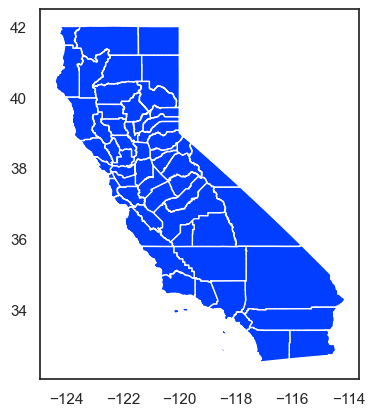

In [43]:
gdf_counties.plot()

<Axes: >

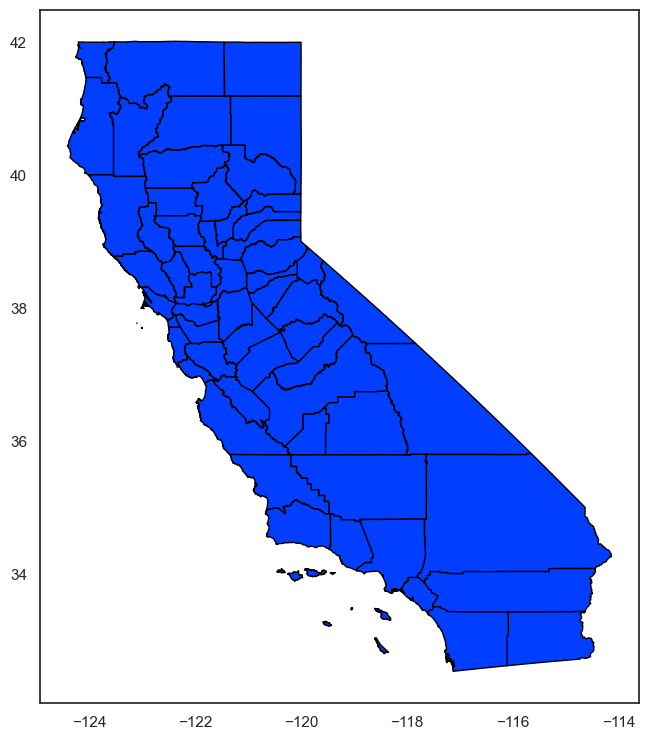

In [44]:
fig, ax = plt.subplots(figsize=(9,9))
gdf_counties.plot(
    ax=ax,
    edgecolor="black"
    
)


<function matplotlib.pyplot.show(close=None, block=None)>

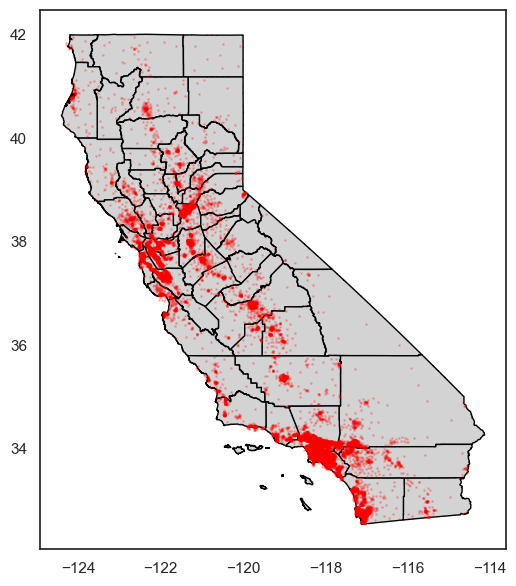

In [45]:
fig, ax = plt.subplots(figsize=(7,7))

gdf_counties.plot(
    ax=ax,
    edgecolor="black",
    color = "lightgrey",
    
    
)

ax.scatter(
    gdf_joined["longitude"],
    gdf_joined["latitude"],
    color="red",
    s=1,
    alpha=SCATTER_ALPHA
    
)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

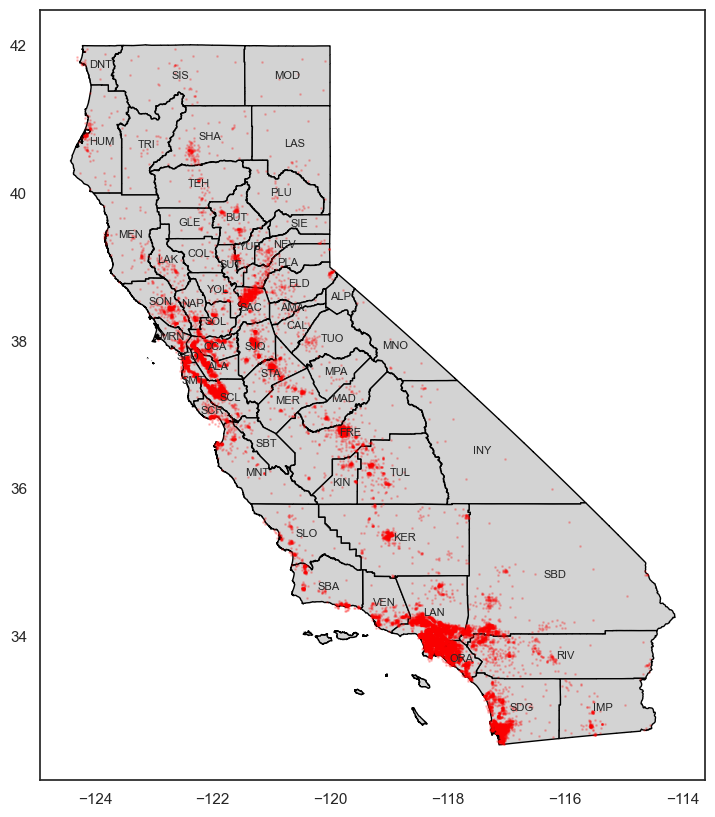

In [46]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_counties.plot(
    ax=ax,
    edgecolor="black",
    color = "lightgrey",
    
    
)

ax.scatter(
    gdf_joined["longitude"],
    gdf_joined["latitude"],
    color="red",
    s=1,
    alpha=SCATTER_ALPHA
    
)

for x, y, abbrev in zip(gdf_counties["centroid"].x, gdf_counties["centroid"].y, gdf_counties["abbrev"]):
    ax.text(x, y, abbrev, fontsize=8, ha="center", va="center")

plt.show

In [47]:
gdf_joined.groupby("name").median(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
name,,,,,,,,,,,,,
Alameda,-122.129997,37.709999,35.0,1938.0,399.0,1039.0,382.0,3.57140,188600.0,3.0,5.075716,2.719877,0.207107
Alpine,-119.860001,38.824997,18.5,1407.5,334.0,402.5,203.5,2.00180,165050.0,2.0,7.331940,2.027528,0.236384
Amador,-120.720001,38.430000,17.0,1787.0,357.0,767.0,305.0,3.04650,116700.0,3.0,6.058824,2.435115,0.191900
Butte,-121.599998,39.709999,22.0,1875.0,372.5,936.5,356.5,2.31895,86450.0,2.0,5.308164,2.514830,0.199470
Calaveras,-120.559998,38.200001,17.0,2745.0,559.0,1061.0,459.0,2.56670,101600.0,2.0,5.994983,2.488000,0.204878
Colusa,-122.044998,39.180000,34.0,1497.0,309.0,665.0,265.0,2.50920,68950.0,2.0,5.468055,2.895284,0.204971
Contra Costa,-122.070000,37.950001,27.0,2399.5,439.5,1143.0,425.5,4.37500,184950.0,3.0,5.677517,2.716802,0.184961
Del Norte,-124.169998,41.764999,19.0,2705.5,560.5,1290.0,486.5,2.22895,76650.0,2.0,5.523724,2.721776,0.207599
El Dorado,-120.709999,38.759998,17.0,2259.0,459.0,916.0,351.0,3.15000,128300.0,3.0,6.183511,2.676471,0.195695


In [48]:
gdf_counties = gdf_counties.merge(
    gdf_joined.groupby("name").median(numeric_only=True),
    left_on="name",
    right_index=True
)

In [49]:
gdf_counties.head()

,name,fullname,abbrev,abcode,ansi,geometry,centroid,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.45 41.184, -121.46 41.184, -121...",POINT (-122.54 41.593),-122.544998,41.614998,23.0,2372.0,482.0,1111.0,427.0,2.17525,63950.0,2.0,5.848729,2.534145,0.201014
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19 41.736, -124.19 41.737...",POINT (-123.9 41.743),-124.169998,41.764999,19.0,2705.5,560.5,1290.0,486.5,2.22895,76650.0,2.0,5.523724,2.721776,0.207599
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.45 41.997, -121.42 41.997, -121...",POINT (-120.73 41.59),-120.529999,41.575001,22.0,2472.0,473.5,860.5,349.5,2.18775,50250.0,2.0,6.891730,2.537227,0.197889
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.67 40.776, -122.67 40.776, -122...",POINT (-123.11 40.651),-123.125000,40.639999,18.5,954.0,211.5,369.5,154.0,1.90705,77100.0,2.0,6.116148,2.541760,0.225996
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17 40.379, -122.17 40.379, -122...",POINT (-122.04 40.763),-122.349998,40.570000,19.0,2251.0,463.0,1077.0,412.0,2.40790,85200.0,2.0,5.487129,2.714097,0.198684


In [50]:
gdf_joined[["name","ocean_proximity"]].groupby("name").describe()

ocean_proximity                         
                          count unique         top  freq
name                                                    
Alameda                     737      3    NEAR BAY   617
Alpine                        2      1      INLAND     2
Amador                       27      1      INLAND    27
Butte                       144      1      INLAND   144
Calaveras                    25      1      INLAND    25
Colusa                       14      1      INLAND    14
Contra Costa                558      3    NEAR BAY   379
Del Norte                    16      2  NEAR OCEAN    14
El Dorado                   101      1      INLAND   101
Fresno                      491      1      INLAND   491
Glenn                        26      1      INLAND    26
Humboldt                    109      3  NEAR OCEAN    78
Imperial                    115      1      INLAND   115
Inyo                         18      1      INLAND    18
Kern                        353      1      INLAND   353
Kings                        86      1      INLAND    86
Lake                         81      2      INLAND    75
Lassen                       19      1      INLAND    19
Los Angeles                4827      3   <1H OCEAN  4180
Madera                       74      1      INLAND    74
Marin                       123      3    NEAR BAY    98
Mariposa                     17      1      INLAND    17
Mendocino                    77      3   <1H OCEAN    61
Merced                      123      1      INLAND   123
Modoc                         8      1      INLAND     8
Mono                          8      1      INLAND     8
Monterey                    170      3   <1H OCEAN   126
Napa                         94      3    NEAR BAY    59
Nevada                       80      1      INLAND    80
Orange                     1438      2   <1H OCEAN  1378
Placer                      101      1      INLAND   101
Plumas                       23      1      INLAND    23
Riverside                   504      2      INLAND   461
Sacramento                  622      1      INLAND   622
San Benito                   26      2      INLAND    25
San Bernardino              729      2      INLAND   725
San Diego                  1467      3  NEAR OCEAN   940
San Francisco               213      2    NEAR BAY   140
San Joaquin                 387      1      INLAND   387
San Luis Obispo             128      3   <1H OCEAN    70
San Mateo                   336      2  NEAR OCEAN   270
Santa Barbara               261      2  NEAR OCEAN   142
Santa Clara                 824      4   <1H OCEAN   724
Santa Cruz                  186      2  NEAR OCEAN   133
Shasta                      119      1      INLAND   119
Sierra                        5      1      INLAND     5
Siskiyou                     34      1      INLAND    34
Solano                      178      2      INLAND   115
Sonoma                      293      3   <1H OCEAN   273
Stanislaus                  282      1      INLAND   282
Sutter                       56      1      INLAND    56
Tehama                       47      1      INLAND    47
Trinity                      22      1      INLAND    22
Tulare                      246      1      INLAND   246
Tuolumne                     46      1      INLAND    46
Ventura                     343      3   <1H OCEAN   193
Yolo                         74      1      INLAND    74
Yuba                         51      1      INLAND    51

In [51]:
county_ocean_prox = gdf_joined[["name","ocean_proximity"]].groupby("name").agg(pd.Series.mode)


In [52]:
gdf_counties = gdf_counties.merge(
    county_ocean_prox,
    left_on="name",
    right_index=True
)

In [53]:
gdf_counties.head()

,name,fullname,abbrev,abcode,ansi,geometry,centroid,longitude,latitude,housing_median_age,...,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.45 41.184, -121.46 41.184, -121...",POINT (-122.54 41.593),-122.544998,41.614998,23.0,...,482.0,1111.0,427.0,2.17525,63950.0,2.0,5.848729,2.534145,0.201014,INLAND
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19 41.736, -124.19 41.737...",POINT (-123.9 41.743),-124.169998,41.764999,19.0,...,560.5,1290.0,486.5,2.22895,76650.0,2.0,5.523724,2.721776,0.207599,NEAR OCEAN
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.45 41.997, -121.42 41.997, -121...",POINT (-120.73 41.59),-120.529999,41.575001,22.0,...,473.5,860.5,349.5,2.18775,50250.0,2.0,6.891730,2.537227,0.197889,INLAND
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.67 40.776, -122.67 40.776, -122...",POINT (-123.11 40.651),-123.125000,40.639999,18.5,...,211.5,369.5,154.0,1.90705,77100.0,2.0,6.116148,2.541760,0.225996,INLAND
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17 40.379, -122.17 40.379, -122...",POINT (-122.04 40.763),-122.349998,40.570000,19.0,...,463.0,1077.0,412.0,2.40790,85200.0,2.0,5.487129,2.714097,0.198684,INLAND


In [54]:
gdf_counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   name                      58 non-null     object  
 1   fullname                  58 non-null     object  
 2   abbrev                    58 non-null     object  
 3   abcode                    58 non-null     object  
 4   ansi                      58 non-null     object  
 5   geometry                  58 non-null     geometry
 6   centroid                  58 non-null     geometry
 7   longitude                 58 non-null     float32 
 8   latitude                  58 non-null     float32 
 9   housing_median_age        58 non-null     float64 
 10  total_rooms               58 non-null     float64 
 11  total_bedrooms            58 non-null     float64 
 12  population                58 non-null     float64 
 13  households                58 non-null     fl

<function matplotlib.pyplot.show(close=None, block=None)>

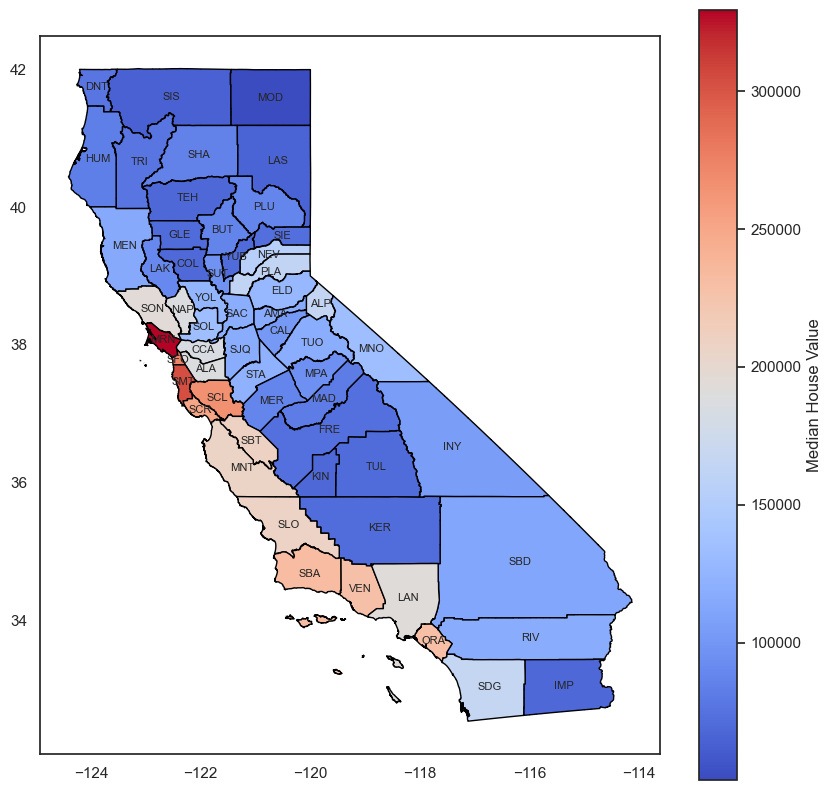

In [55]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_counties.plot(
    ax=ax,
    edgecolor="black",
    column = "median_house_value",
    cmap = "coolwarm",
    legend = True,
    legend_kwds = {"label": "Median House Value"}
    
    
)



for x, y, abbrev in zip(gdf_counties["centroid"].x, gdf_counties["centroid"].y, gdf_counties["abbrev"]):
    ax.text(x, y, abbrev, fontsize=8, ha="center", va="center")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

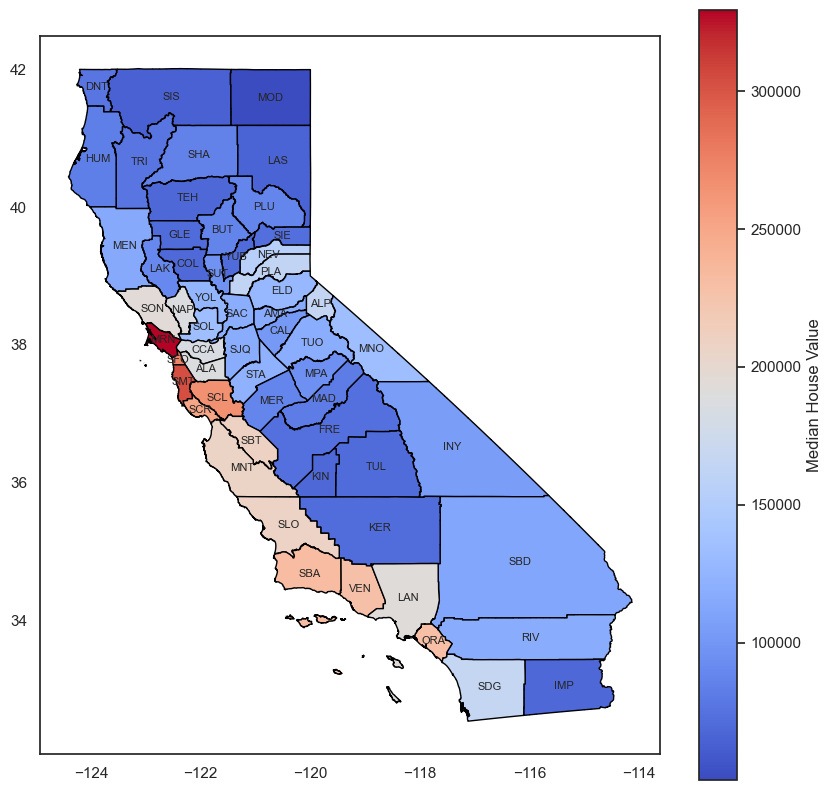

In [56]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_counties.plot(
    ax=ax,
    edgecolor="black",
    column = "median_house_value",
    cmap = "coolwarm",
    legend = True,
    legend_kwds = {"label": "Median House Value"}
    
    
)



for x, y, abbrev in zip(gdf_counties["centroid"].x, gdf_counties["centroid"].y, gdf_counties["abbrev"]):
    ax.text(x, y, abbrev, fontsize=8, ha="center", va="center")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

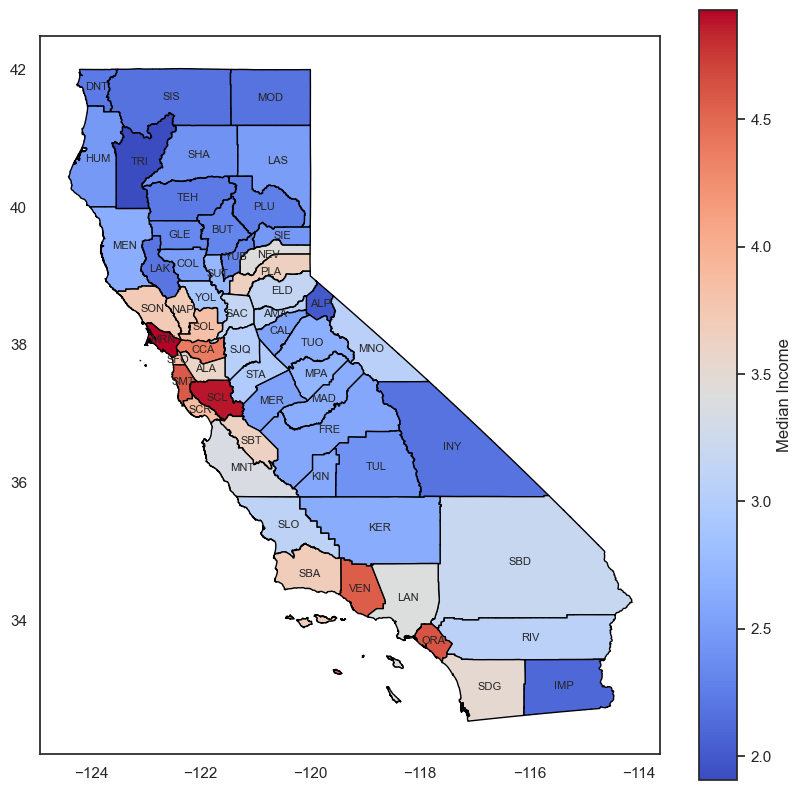

In [57]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_counties.plot(
    ax=ax,
    edgecolor="black",
    column = "median_income",
    cmap = "coolwarm",
    legend = True,
    legend_kwds = {"label": "Median Income", "orientation": "vertical"}
    
    
)



for x, y, abbrev in zip(gdf_counties["centroid"].x, gdf_counties["centroid"].y, gdf_counties["abbrev"]):
    ax.text(x, y, abbrev, fontsize=8, ha="center", va="center")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

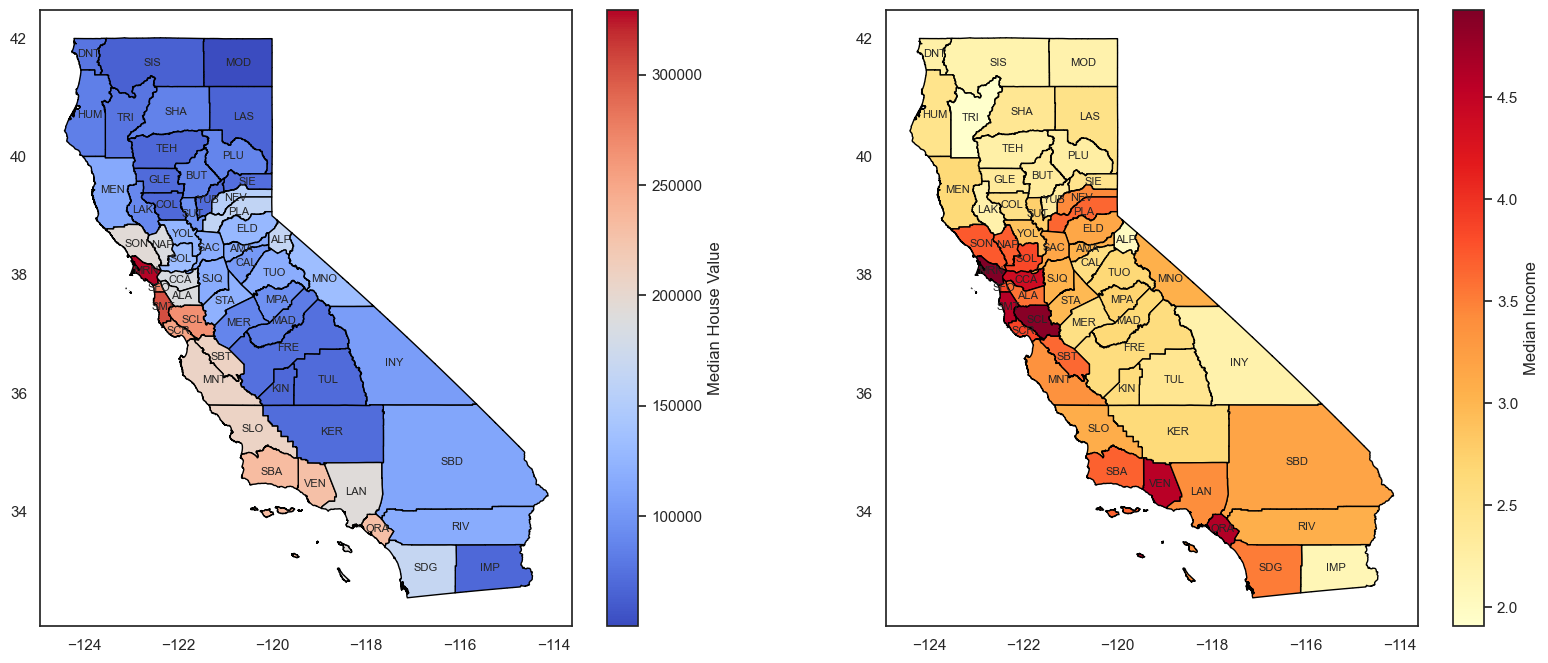

In [58]:
fig, axs = plt.subplots(1,2, figsize=(20,8))


gdf_counties.plot(
    ax=axs[0],
    edgecolor="black",
    column = "median_house_value",
    cmap =PALETTE,
    legend = True,
    legend_kwds = {"label": "Median House Value", "orientation":"vertical"}
)
gdf_counties.plot(
    ax=axs[1],
    edgecolor="black",
    column = "median_income",
    cmap = "YlOrRd",
    legend = True,
    legend_kwds = {"label": "Median Income", "orientation":"vertical"}
    
    
)


for x, y, abbrev in zip(gdf_counties["centroid"].x, gdf_counties["centroid"].y, gdf_counties["abbrev"]):
    axs[0].text(x, y, abbrev, fontsize=8, ha="center", va="center")
    axs[1].text(x, y, abbrev, fontsize=8, ha="center", va="center")
    

plt.show

In [108]:
centro_mapa = [df["latitude"].mean(), df["longitude"].mean()]
centro_mapa

[35.6022, -119.509995]

In [122]:
tamanho_mapa_folium = {"width": 500, "height": 500}
fig = folium.Figure(**tamanho_mapa_folium)
mapa = folium.Map(location=centro_mapa).add_to(fig)

In [124]:
mapa

In [131]:
tamanho_mapa_folium = {"width": 500, "height": 500}
fig = folium.Figure(**tamanho_mapa_folium)
mapa = folium.Map(location=centro_mapa, zoom_start=6).add_to(fig)
mapa